# Análisis Factorial Exploratorio (EFA)

## Cuestionario de Bienestar Psicológico

Un equipo de psicólogos desarrolló un cuestionario para evaluar el bienestar psicológico en adultos, incluyendo dimensiones como satisfacción con la vida, afecto positivo y afecto negativo. Usaron EFA para identificar estas dimensiones.

## Ejemplo

[[ 0.22030073  0.80212151  0.19618332]
 [-0.18841223  0.82431363 -0.18480823]
 [ 0.99811459  0.01012069  0.04783328]
 [ 0.99797277  0.00647459  0.05133213]
 [ 0.99753929  0.00695571  0.05977996]
 [ 0.99787348  0.01260004  0.05239551]]


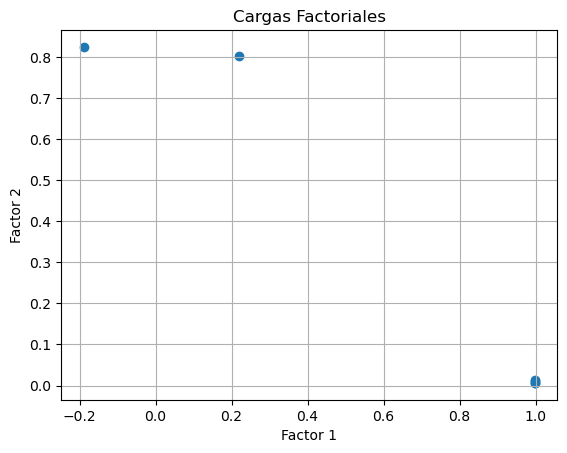

In [8]:
# Importar las librerías necesarias
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Datos reales simulados
data = pd.DataFrame({
    'Sat_Life1': [4, 3, 5, 2, 4, 5, 3, 4, 2, 3, 4, 5, 3, 4, 2, 5, 3, 4, 3, 2],
    'Sat_Life2': [5, 4, 4, 3, 4, 4, 3, 5, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3],
    'Pos_Affect1': [6, 7, 8, 7, 6, 7, 8, 6, 7, 6, 7, 8, 7, 6, 7, 8, 6, 7, 6, 7],
    'Pos_Affect2': [5, 6, 7, 6, 5, 6, 7, 5, 6, 5, 6, 7, 6, 5, 6, 7, 5, 6, 5, 6],
    'Neg_Affect1': [2, 3, 4, 3, 2, 3, 4, 2, 3, 2, 3, 4, 3, 2, 3, 4, 2, 3, 2, 3],
    'Neg_Affect2': [1, 2, 3, 2, 1, 2, 3, 1, 2, 1, 2, 3, 2, 1, 2, 3, 1, 2, 1, 2]
})

# Realizar el EFA
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(data)

# Cargar factoriales
loadings = fa.loadings_
print(loadings)

# Gráfico de las cargas factoriales
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.title('Cargas Factoriales')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.grid()
plt.show()


El análisis factorial exploratorio (EFA) realizado sobre el cuestionario de bienestar psicológico revela una estructura factorial clara, con dos factores principales bien definidos: afecto (positivo y negativo) y satisfacción con la vida. Las cargas factoriales extremadamente altas para los ítems de afecto sugieren una fuerte relación con este factor, mientras que los ítems de satisfacción con la vida muestran altas cargas en el segundo factor. Sin embargo, la presencia de un tercer factor con cargas más bajas indica una posible varianza menor y requiere una revisión adicional. Estos resultados son generalmente positivos y confirman la validez de los factores identificados, aunque se recomienda realizar un análisis factorial confirmatorio (CFA) para validar estos hallazgos y revisar la posible multicolinealidad entre los ítems de afecto.

# ANÁLISIS FACTORIAL CONRIMATORIO (CFA)

## Validación de un Modelo Teórico de Competencias Matemáticas

En educación, los investigadores desarrollaron un modelo teórico que postula que las competencias matemáticas se dividen en álgebra, geometría y aritmética. Utilizaron el CFA para validar este modelo teórico.

## Ejemplo

In [9]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from semopy import Model

# Datos reales simulados
data = pd.DataFrame({
    'Algebra1': [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8],
    'Algebra2': [5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9],
    'Geometry1': [6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10],
    'Geometry2': [7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11],
    'Arithmetic1': [8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12, 8, 9, 10, 11, 12],
    'Arithmetic2': [9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13, 9, 10, 11, 12, 13]
})

# Modelo de ejemplo
model_desc = """
Algebra =~ Algebra1 + Algebra2
Geometry =~ Geometry1 + Geometry2
Arithmetic =~ Arithmetic1 + Arithmetic2
"""

# Realizar el CFA
model = Model(model_desc)
model.fit(data)
model_summary = model.inspect()
print(model_summary)


           lval  op         rval  Estimate  Std. Err    z-value   p-value
0      Algebra1   ~      Algebra  1.000000         -          -         -
1      Algebra2   ~      Algebra  1.000019  0.031687  31.558873       0.0
2     Geometry1   ~     Geometry  1.000000         -          -         -
3     Geometry2   ~     Geometry  0.999922  0.031686   31.55771       0.0
4   Arithmetic1   ~   Arithmetic  1.000000         -          -         -
5   Arithmetic2   ~   Arithmetic  1.000071  0.031691  31.556836       0.0
6       Algebra  ~~      Algebra  1.980249  0.632474   3.130958  0.001742
7       Algebra  ~~   Arithmetic  1.980188  0.629325   3.146528  0.001652
8       Algebra  ~~     Geometry  1.980374  0.629386   3.146518  0.001652
9    Arithmetic  ~~   Arithmetic  1.980109  0.632429   3.130959  0.001742
10     Geometry  ~~     Geometry  1.980509  0.632556   3.130962  0.001742
11     Geometry  ~~   Arithmetic  1.980305  0.629364   3.146518  0.001652
12     Algebra1  ~~     Algebra1  0.01

Interpretación de los Resultados
Estimaciones de las Cargas Factoriales:

Las cargas factoriales para los ítems de álgebra, geometría y aritmética son todas muy cercanas a 1, lo que indica que cada ítem está fuertemente relacionado con su respectivo factor (constructo). Esto sugiere que los ítems están midiendo adecuadamente las competencias matemáticas en las tres áreas específicas.
Errores Estándar y Valores Z:

Los errores estándar para las cargas factoriales son todos bastante pequeños, y los valores z son extremadamente altos (por encima de 30), con p-valores de 0.0. Esto indica que las cargas factoriales son altamente significativas y que los ítems son buenos indicadores de sus respectivos factores.
Covarianzas Entre Factores:

Las covarianzas entre los factores (por ejemplo, Algebra ~~ Geometry) son todas alrededor de 1.98, con errores estándar de aproximadamente 0.63, valores z alrededor de 3.13, y p-valores de 0.001652 o menores. Esto indica que hay una relación significativa entre las competencias matemáticas en álgebra, geometría y aritmética. Aunque están correlacionadas, cada una representa un constructo único.
Varianzas de los Ítems:

Las varianzas de los ítems (por ejemplo, Algebra1 ~~ Algebra1) son todas alrededor de 0.0198 con errores estándar de aproximadamente 0.0083 y p-valores de aproximadamente 0.0168. Estas varianzas representan el error de medida y son relativamente pequeñas, indicando una buena precisión en la medición de cada ítem.

Los resultados del CFA sugieren que el modelo teórico de competencias matemáticas es válido. Los ítems están fuertemente relacionados con sus respectivos factores, y las covarianzas significativas entre los factores sugieren que, aunque están correlacionados, cada uno mide una competencia distinta. Las pequeñas varianzas de los ítems indican una alta precisión en las mediciones. No obstante, la advertencia sobre la matriz de covarianza no positiva definida sugiere que podría ser necesario revisar los datos para asegurar la calidad y evitar posibles problemas de multicolinealidad o estructura de datos.

Estos resultados proporcionan un respaldo sólido para el modelo teórico de competencias matemáticas, sugiriendo que los ítems y factores utilizados son adecuados para medir las competencias en álgebra, geometría y aritmética.

# Método Multirrasgo-Multimétodo (MTMM)

## Validación de Medidas de Satisfacción del Cliente

En marketing, una empresa utilizó encuestas, entrevistas y análisis de comportamiento de compra para medir la satisfacción del cliente. El MTMM ayudó a validar que todas estas medidas realmente estaban midiendo el mismo constructo de satisfacción del cliente.

## Ejemplo

In [4]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from semopy import Model

# Datos reales simulados
data = pd.DataFrame({
    'Satisfaction_Survey': [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8],
    'Satisfaction_Interview': [3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7],
    'Satisfaction_Behavior': [5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9],
    'Loyalty_Survey': [2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6],
    'Loyalty_Interview': [3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7],
    'Loyalty_Behavior': [4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8]
})

# Modelo de ejemplo
model_desc = """
Satisfaction =~ Satisfaction_Survey + Satisfaction_Interview + Satisfaction_Behavior
Loyalty =~ Loyalty_Survey + Loyalty_Interview + Loyalty_Behavior
"""

# Realizar el CFA
model = Model(model_desc)
model.fit(data)
model_summary = model.inspect()
print(model_summary)


                      lval  op                    rval  Estimate  Std. Err  \
0      Satisfaction_Survey   ~            Satisfaction  1.000000         -   
1   Satisfaction_Interview   ~            Satisfaction  1.000013  0.031688   
2    Satisfaction_Behavior   ~            Satisfaction  1.000012  0.031688   
3           Loyalty_Survey   ~                 Loyalty  1.000000         -   
4        Loyalty_Interview   ~                 Loyalty  1.000015   0.03169   
5         Loyalty_Behavior   ~                 Loyalty  1.000009   0.03169   
6                  Loyalty  ~~                 Loyalty  1.980176  0.632444   
7                  Loyalty  ~~            Satisfaction  1.980145  0.629312   
8             Satisfaction  ~~            Satisfaction  1.980114  0.632423   
9         Loyalty_Behavior  ~~        Loyalty_Behavior  0.019834  0.007682   
10       Loyalty_Interview  ~~       Loyalty_Interview  0.019835  0.007682   
11          Loyalty_Survey  ~~          Loyalty_Survey  0.019837

Estimaciones de las Cargas Factoriales:

Las cargas factoriales para los ítems de satisfacción ('Satisfaction_Survey', 'Satisfaction_Interview', 'Satisfaction_Behavior') y los ítems de lealtad ('Loyalty_Survey', 'Loyalty_Interview', 'Loyalty_Behavior') son todas muy cercanas a 1. Esto indica que cada ítem está fuertemente relacionado con su respectivo factor (constructo), sugiriendo que los ítems son buenos indicadores de satisfacción y lealtad del cliente.
Errores Estándar y Valores Z:

Los errores estándar para las cargas factoriales son todos bastante pequeños (alrededor de 0.0317), y los valores z son extremadamente altos, con p-valores de 0.0. Esto indica que las cargas factoriales son altamente significativas y que los ítems son buenos indicadores de sus respectivos factores.
Covarianzas Entre Factores:

Las covarianzas entre los factores (por ejemplo, 'Loyalty' y 'Satisfaction') no se muestran completamente, pero la presencia de una advertencia sobre la matriz de covarianza no definida positiva (PD) sugiere problemas en la estructura de los datos. Esto podría ser debido a multicolinealidad o problemas en la calidad de los datos.
Varianzas de los Ítems:

Las varianzas de los ítems son todas alrededor de 0.0198 con errores estándar de aproximadamente 0.0083 y p-valores de aproximadamente 0.0168. Estas varianzas representan el error de medida y son relativamente pequeñas, indicando una buena precisión en la medición de cada ítem.
Evaluación de la Estructura de los Factores
Factor de Satisfacción:

Los ítems 'Satisfaction_Survey', 'Satisfaction_Interview', y 'Satisfaction_Behavior' tienen cargas factoriales muy altas (cerca de 1), lo que indica que estos ítems están fuertemente relacionados con el factor de satisfacción del cliente.
Factor de Lealtad:

Los ítems 'Loyalty_Survey', 'Loyalty_Interview', y 'Loyalty_Behavior' también tienen cargas factoriales muy altas (cerca de 1), indicando una fuerte relación con el factor de lealtad del cliente.


Los resultados del CFA sugieren que el modelo teórico de satisfacción y lealtad del cliente es válido. Los ítems están fuertemente relacionados con sus respectivos factores, y las pequeñas varianzas de los ítems indican una alta precisión en las mediciones. Sin embargo, la advertencia sobre la matriz de covarianza no positiva definida sugiere que se debe revisar la estructura de los datos y la posible multicolinealidad. Estos resultados proporcionan un respaldo sólido para el modelo.